In [1]:
import tensorflow_datasets as tfds
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [9]:
dinfo = pd.read_csv("data/info.csv")
dinfo.head(10)

,class id,filepaths,labels,data set
0,0,train/ADONIS/001.jpg,ADONIS,train
1,0,train/ADONIS/002.jpg,ADONIS,train
2,0,train/ADONIS/003.jpg,ADONIS,train
3,0,train/ADONIS/004.jpg,ADONIS,train
4,0,train/ADONIS/005.jpg,ADONIS,train
5,0,train/ADONIS/006.jpg,ADONIS,train
6,0,train/ADONIS/007.jpg,ADONIS,train
7,0,train/ADONIS/008.jpg,ADONIS,train
8,0,train/ADONIS/009.jpg,ADONIS,train
9,0,train/ADONIS/010.jpg,ADONIS,train


In [3]:
dinfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13594 entries, 0 to 13593
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   class id   13594 non-null  int64 
 1   filepaths  13594 non-null  object
 2   labels     13594 non-null  object
 3   data set   13594 non-null  object
dtypes: int64(1), object(3)
memory usage: 424.9+ KB


<Axes: xlabel='labels'>

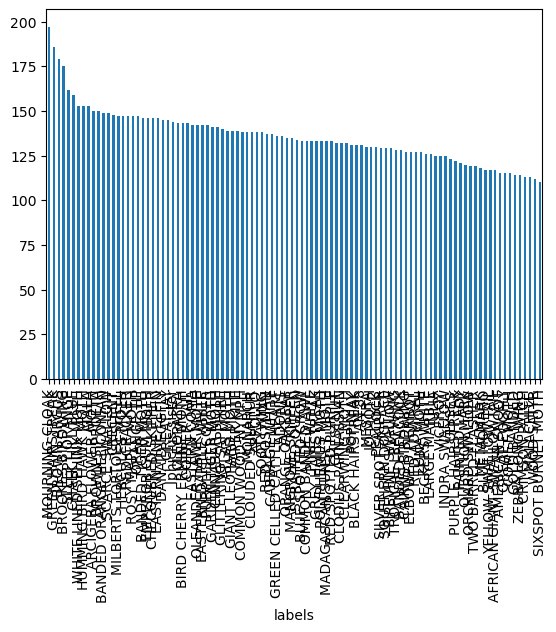

In [4]:
dinfo.labels.value_counts().plot.bar()

In [4]:
df = dinfo[dinfo["data set"] == "train"]


In [5]:
class DataSet:

    def __init__(self, path="data", stat="train"):
        self.path = path
        dinfo = pd.read_csv(f"{path}/info.csv")
        self.dinfo = dinfo[dinfo["data set"] == stat]

    def get_data(self):
        size = len(self.dinfo.filepaths)
        x_data = np.zeros((size, 224, 224, 3), dtype=np.uint8)
        y_data = np.zeros((size,), dtype=np.uint8)
        n = 0
        for id_cl, fl, *_ in self.dinfo.values:
            x_data[n] = np.array(Image.open(f"{self.path}/{fl}"), dtype=np.uint8)
            y_data[n] = id_cl

            n += 1

        return x_data, y_data


x, y = DataSet().get_data()


(12594, 224, 224, 3) (12594,)


(<matplotlib.image.AxesImage at 0x169a1bd00>, 8)

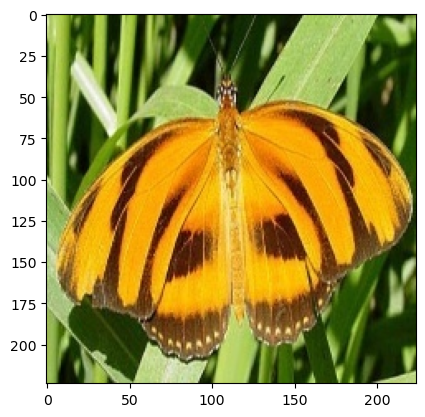

In [8]:
print(x.shape,y.shape)
plt.imshow(x[1000]),y[1000]